# Group Project Team 2

## Using Machine Learning Algorithms to predict CardioVascular Disease

In [60]:
# Group Project Team 2 - Comparison of various models for CardioVascular Disease
# Data Information - taken from https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
# age in days
# gender:                  1 - women, 2 - men
# height cm
# weight kg
# ap_hiSystolic blood pressure
# ap_loDiastolic blood pressure
# cholesterol:             1: normal, 2: above normal, 3: well above normal
# gluc:                    1:normal, 2: above normal, 3: well above normal
# smoke:                   1 when patient smoke, 0 when patient don't smoke
# alco Binary feature:     1 when patient drinks alcohol, 0 when patient don't drink alcohol
# active Binary feature:   1 when patient is active, 0 when patient is not active
# cardio Target variable:  1 when patient has cardiovascular desease, 0 for healthy patient.

In [61]:
# Import Libraries and read datafile
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import os
import time
import csv
df = read_csv('cardio_train.csv', sep=';')
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 1. Clean the dataset

In [62]:
# Check for missing data
# df.isnull().values.any()
print("There is {} missing values in data frame".format(df.isnull().sum().sum()))
df.shape

There is 0 missing values in data frame


(70000, 13)

In [63]:
# Drop id since it is not useful for modelling
df.drop("id",axis=1,inplace=True)
df.shape

(70000, 12)

In [64]:
# Check for duplicate data
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))
duplicated = df[df.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['age', "gender", "height"], ascending= False) 
duplicated.head(4) # Show us just 2 duplications

There is 24 duplicated values in data frame


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2677,22077,1,175,69.0,120,80,1,1,0,0,1,1
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1
1568,21945,1,165,60.0,120,80,1,1,0,0,1,0
48917,21945,1,165,60.0,120,80,1,1,0,0,1,0


In [65]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Confirm the removal
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))
df.shape

There is 0 duplicated values in data frame


(69976, 12)

In [66]:
# Convert the age from days to years
df['age'] = (df['age'] / 365).round().astype('int')
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [67]:
# Explore the data
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.338945,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,6.765633,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


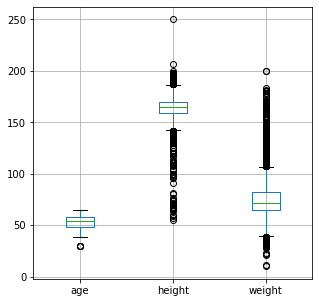

In [68]:
# Explore the patients height and weight
# Min weight is 10 kg, min height is 55cm, min age is 30 years old (10kg is not normal for anyone 30 years old or more)
# Max weight is 200 kg, max height is 250cm, max age is 65 years old (250 cm is not normal for anyone)
plt.figure(figsize=(5,5))
X = df[['age','height', 'weight']]
X.boxplot(column = ['age','height', 'weight'])

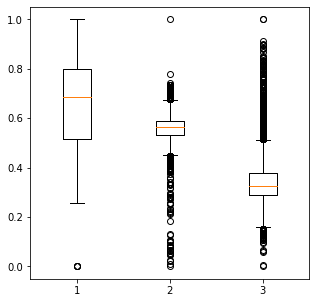

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_m = MinMaxScaler().fit_transform(X)
plt.figure(figsize=(5,5))
plt.boxplot(X_m)
plt.show()

In [70]:
# To improve data quality, remove outliers.
# Let's remove weights and heights, that fall below 1% or above 99% of a given range.
df.drop(df[(df['height'] > df['height'].quantile(0.99)) | (df['height'] < df['height'].quantile(0.01))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.99)) | (df['weight'] < df['weight'].quantile(0.01))].index,inplace=True)
df.shape

(67502, 12)

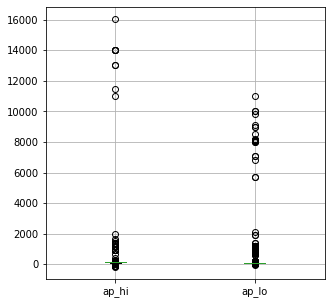

In [71]:
# Explore the patients pressure 
plt.figure(figsize=(5,5))
X = df[['ap_hi','ap_lo']]
X.boxplot(column = ['ap_hi','ap_lo'])

In [72]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67502.000000,67502.000000,67502.000000,67502.000000,67502.000000,67502.000000,67502.000000,67502.000000,67502.000000,67502.000000,67502.000000,67502.000000
mean,53.352123,1.349293,164.456638,73.875724,128.821502,96.310124,1.364197,1.224808,0.087627,0.053421,0.804095,0.499141
std,6.753830,0.476750,7.321673,12.936256,156.730020,186.248353,0.678584,0.570837,0.282754,0.224872,0.396899,0.500003
min,30.000000,1.000000,147.000000,48.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,184.000000,117.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
# Noticed that min blood pressure is negative and max blood pressure is more than 10000. Let us remove outlier
# Remove those that fall below 1.5% or above 98.5% of a given range.
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.985)) | (df['ap_hi'] < df['ap_hi'].quantile(0.015))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.985)) | (df['ap_lo'] < df['ap_lo'].quantile(0.015))].index,inplace=True)
df.shape

(65149, 12)

In [75]:
# Let us check the blood pressure data
# Diastolic pressure cannot be higher than systolic. How many records are inaccurate in terms of blood pressure?
# Remove data where diastolic pressure is higher than systolic pressure.
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))
df.drop(df[(df['ap_lo'] > df['ap_hi'])].index,inplace=True)   
df.shape

Diastilic pressure is higher than systolic one in 0 cases


(65147, 12)

In [76]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000
mean,53.310682,1.347645,164.471887,73.710447,125.873993,81.043440,1.357576,1.222036,0.086942,0.052527,0.804151,0.489324
std,6.758899,0.476226,7.293385,12.836057,15.029385,8.809493,0.674307,0.568265,0.281752,0.223090,0.396856,0.499890
min,30.000000,1.000000,147.000000,48.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,184.000000,117.000000,173.000000,110.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000
mean,53.310682,1.347645,164.471887,73.710447,125.873993,81.043440,1.357576,1.222036,0.086942,0.052527,0.804151,0.489324
std,6.758899,0.476226,7.293385,12.836057,15.029385,8.809493,0.674307,0.568265,0.281752,0.223090,0.396856,0.499890
min,30.000000,1.000000,147.000000,48.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,184.000000,117.000000,173.000000,110.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


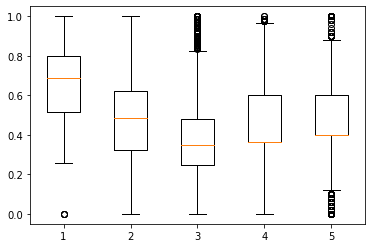

In [78]:
X = df[['age','height', 'weight', 'ap_hi', 'ap_lo']]
#sns.boxplot(x = 'variable',y = 'value',data = X.melt())
X_m = MinMaxScaler().fit_transform(X)
plt.figure()
plt.boxplot(X_m)
plt.show()
blood_pressure = df.loc[:,['age','height', 'weight','ap_lo','ap_hi']]

Data is now cleaned

## 2. Exploratory Data Analysis (EDA)

Number of people without and with CardioVascular Disease


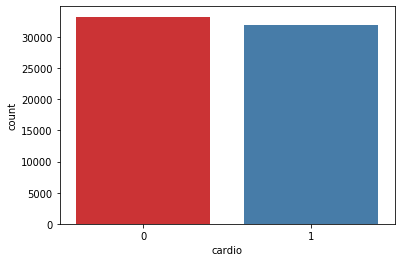

In [79]:
# checking if target are balanced
import seaborn as sns
df.groupby("cardio").count()
#traindata[["cardio","height"]].groupby("Outcome").count()
sns.countplot(x="cardio", data=df, palette="Set1")
print ('Number of people without and with CardioVascular Disease')

Number of people based on gender


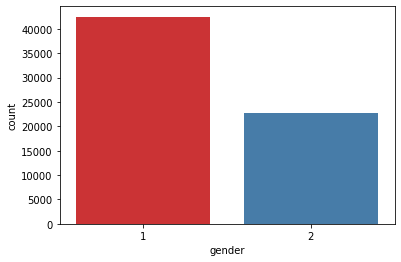

In [80]:
# checking dataset of gender
import seaborn as sns
df.groupby("gender").count()
#traindata[["cardio","height"]].groupby("Outcome").count()
sns.countplot(x="gender", data=df, palette="Set1")
print ('Number of people based on gender')

#### The graph shows that the number of female in the dataset is much more than male.

Visualize gender with CardioVascular Disease


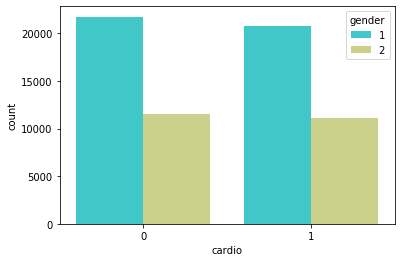

In [81]:
# visualize cardio with gender
sns.countplot(x='cardio',data=df,hue='gender',palette='rainbow')
print ('Visualize gender with CardioVascular Disease')

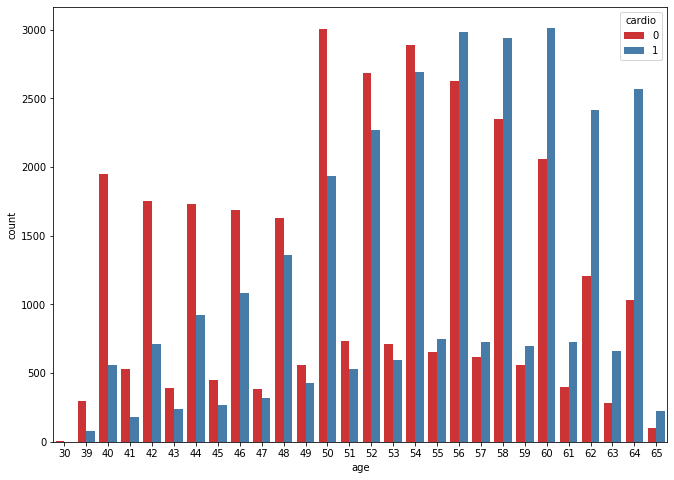

In [82]:
# Explore at what age does the number of people with CVD exceed the number of people without CVD
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='cardio', data = df, palette="Set1");

It can be observed that people over 55 years of age are more exposed to CVD

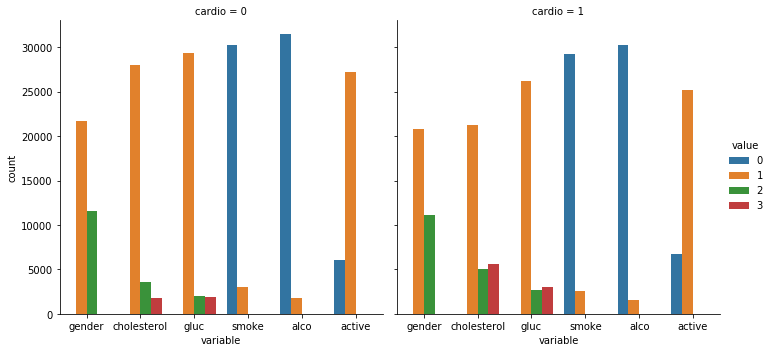

In [83]:
#Bivariate analysis - split categorical variables by target class:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['gender','cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

It can be observed that patients with CVD have higher cholesterol and blood glucose level.  They are likely to be less active.

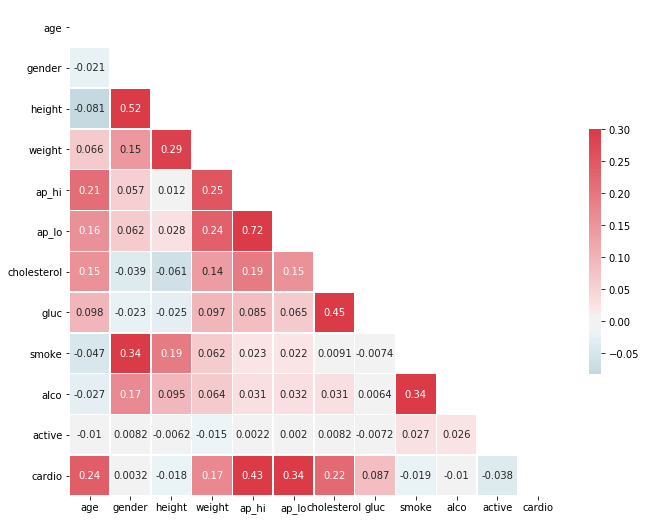

In [84]:
# Multivariate analysis - It might be useful to consider correlation matrix
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## 3. Feature Engineering

### a. Categorizing bmi(Body mass index) 
https://www.medicalnewstoday.com/articles/323622.php

In [85]:
bmi = (df.weight/df.height/df.height)*10000

cat_bmi = []
for n in bmi:
    if n <= 18.5:              #Underweight
        val = 2
    elif n> 18.5 and n<25:     #Healthy
        val = 1
    elif n>= 25 and n<30:      #Overweight
        val = 3
    else:
        val = 4                #Obese
    cat_bmi.append(val)
    
df['bmi'] = cat_bmi

Visualize Body Mass Index with CardioVascular Disease


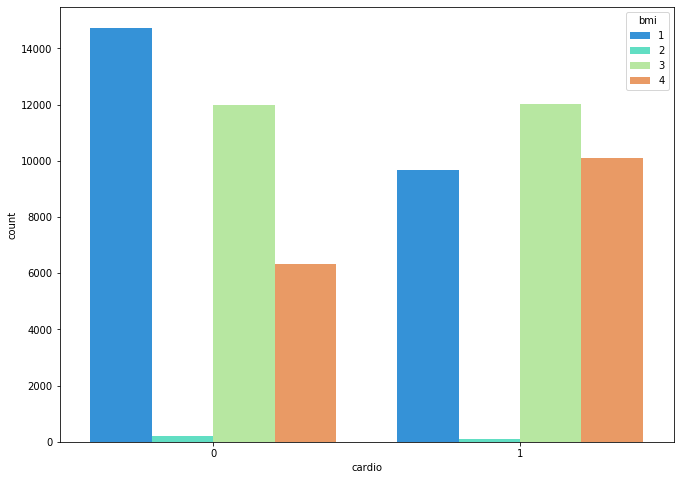

In [86]:
# visualize cardio with bmi
sns.countplot(x='cardio',data=df,hue='bmi',palette='rainbow')
print ('Visualize Body Mass Index with CardioVascular Disease')

#### The figure shows that obese person tends to have higher risk of cardiovascular disease

### b. Categorizing blood pressure 
https://www.webmd.com/hypertension-high-blood-pressure/guide/diastolic-and-systolic-blood-pressure-know-your-numbers#1

In [87]:
bpc = []
for n,v in zip(df.ap_hi, df.ap_lo):
    if n < 120 and v < 80:
        val = 1                                 # Normal
    elif n >= 120 and n < 130 and v < 80:
        val = 2                                 # Elevated
    elif n >= 130 and n < 140 or v >= 80 and n < 90:
        val =3                                  # High blood pressure stage 1(Hypertension)
    elif n >= 140 and n < 180 or v >= 90 and v < 120:
        val = 4                                 # High blood pressure stage 2(Hypertension)
    elif n >= 180 or v >= 120:
        val = 5                                 # Hyertensive Crisis (see doctor immediately)
    bpc.append(val)

df['bpc'] = bpc

Visualize Blood Pressure Category with CardioVascular Disease


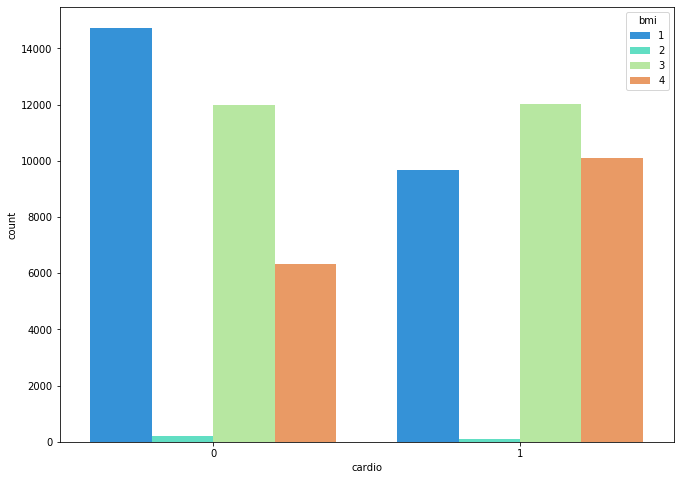

In [88]:
# visualize cardio with bmi
sns.countplot(x='cardio',data=df,hue='bmi',palette='rainbow')
print ('Visualize Blood Pressure Category with CardioVascular Disease')

#### The figure shows that normal blood pressure correlate with lower CVD while hypertensive correlate with higher CVD

In [89]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bpc
count,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000,65147.000000
mean,53.310682,1.347645,164.471887,73.710447,125.873993,81.043440,1.357576,1.222036,0.086942,0.052527,0.804151,0.489324,2.498089,2.934241
std,6.758899,0.476226,7.293385,12.836057,15.029385,8.809493,0.674307,0.568265,0.281752,0.223090,0.396856,0.499890,1.226132,1.206048
min,30.000000,1.000000,147.000000,48.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000
75%,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.000000,4.000000
max,65.000000,2.000000,184.000000,117.000000,173.000000,110.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [90]:
dfy = df["cardio"]
dfx = df
dfx.drop(["cardio"], axis=1, inplace=True)
dfx.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bpc
0,50,2,168,62.0,110,80,1,1,0,0,1,1,1
1,55,1,156,85.0,140,90,3,1,0,0,1,4,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,3
3,48,2,169,82.0,150,100,1,1,0,0,1,3,4
4,48,1,156,56.0,100,60,1,1,0,0,0,1,1


## 4. Exploring Various Classifiers

### a. Train/Test Split

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfx,dfy,test_size=0.25,random_state=42)

In [92]:
# Feature Scaling, required by SVM and KNN algorithms
# MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]. 
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

In [93]:
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(48860, 13) (48860,) (16287, 13) (16287,)


### b. Model Comparison

In [92]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import time
import csv
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# 10 different algorithms explored
nb = GaussianNB()
svm = SVC(kernel='linear')
lr = LogisticRegression( class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000, C = 1, penalty= 'l2')
dt = DecisionTreeClassifier(max_depth=8, min_samples_split=50, min_samples_leaf=50, random_state=13)
rf = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
ada = AdaBoostClassifier(n_estimators=100)
et = ExtraTreesClassifier(n_estimators = 100)          
gb = GradientBoostingClassifier(n_estimators = 100)    
xgb = XGBClassifier(n_estimators= 2000, learning_rate=0.01)

# define models
models = {"Naive Bayes" : nb,
          "SVM" : svm,
          "Logistic Regression" : lr,
          "Decision Tree" : dt,
          "Random Forest" : rf,
          "KNeighborst" : knn,
          "AdaBoost" : ada,
          "Extra Trees" : et,
          "Gradient Boosting" : gb,
          "Extreme Gradient Boosting" : xgb}

# Open file to write result of various models 
csvFile = open("model_result1.csv", 'w+', newline='')
writer = csv.writer(csvFile)
writer.writerow(('Model','Accuracy(train)','Accuracy(test)','F1 Score','Time'))

# iterate through all models

for key, value in models.items():   
    start_time = time.time()
    model = value
    
    # fit & predict training score
    model.fit(x_train, y_train)
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)
    
    accuracy1 = round(accuracy_score(y_train, y_train_predict), 5)
    accuracy2 = round(accuracy_score(y_test, y_test_predict), 5) 
    accuracy3 = round(f1_score(y_test, y_test_predict), 5)
    print ('Processing', key)
    end_time = time.time()
    elapsed_time = round((end_time - start_time), 5)

    # Write result to file
    writer.writerow ((key, accuracy1, accuracy2, accuracy3, elapsed_time))

### CLOSE CSV FILE
csvFile.close()

Processing Naive Bayes
Processing SVM
Processing Logistic Regression
Processing Decision Tree
Processing Random Forest
Processing KNeighborst
Processing AdaBoost
Processing Extra Trees
Processing Gradient Boosting
Processing Extreme Gradient Boosting


### c. Comparisons of various algorithms

#### i. Testing Accuracy

In [93]:
# Read result file from CSV
result = pd.read_csv("model_result1.csv")

# sort by testing accuracy
result.sort_values(by=["Accuracy(test)"], axis=0 ,ascending=False, inplace=True)
result.set_index('Model')

,Accuracy(train),Accuracy(test),F1 Score,Time
Model,,,,
Extreme Gradient Boosting,0.73842,0.72469,0.70142,29.75746
Gradient Boosting,0.73717,0.72444,0.70223,3.03555
Decision Tree,0.73878,0.72125,0.69938,0.08049
AdaBoost,0.72972,0.72008,0.68669,2.58600
Logistic Regression,0.72835,0.71824,0.69506,0.10230
SVM,0.72583,0.71665,0.67743,52.46618
Naive Bayes,0.71832,0.71106,0.68099,0.04439
KNeighborst,0.72603,0.71094,0.67811,25.17822
Random Forest,0.98721,0.70019,0.68576,5.17517


Graph showing the Testing Accuracy for the various models


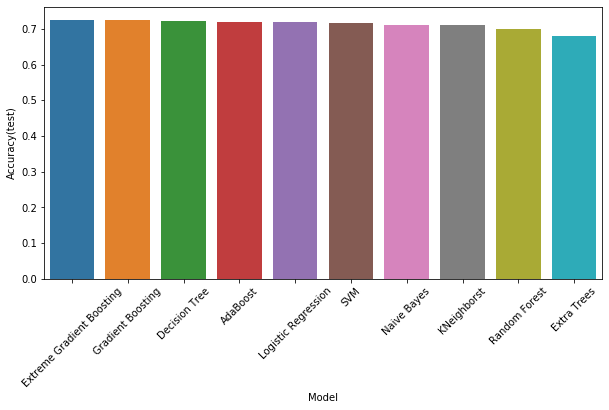

In [94]:
# Plot testing accuracy for various models
plt.figure(figsize=(10,5))
sns.barplot(x=result['Model'],y=result["Accuracy(test)"])
plt.xticks(rotation=45) # Rotation of model names
print ('Graph showing the Testing Accuracy for the various models')

#### ii. F1 Score

In [95]:
# Read result file from CSV
#result = pd.read_csv("model_result1.csv")

# sort by accuracy
result.sort_values(by=["F1 Score"], axis=0 ,ascending=False, inplace=True)
result.set_index('Model')

,Accuracy(train),Accuracy(test),F1 Score,Time
Model,,,,
Gradient Boosting,0.73717,0.72444,0.70223,3.03555
Extreme Gradient Boosting,0.73842,0.72469,0.70142,29.75746
Decision Tree,0.73878,0.72125,0.69938,0.08049
Logistic Regression,0.72835,0.71824,0.69506,0.10230
AdaBoost,0.72972,0.72008,0.68669,2.58600
Random Forest,0.98721,0.70019,0.68576,5.17517
Naive Bayes,0.71832,0.71106,0.68099,0.04439
KNeighborst,0.72603,0.71094,0.67811,25.17822
SVM,0.72583,0.71665,0.67743,52.46618


Graph showing the F1 Score for the various models


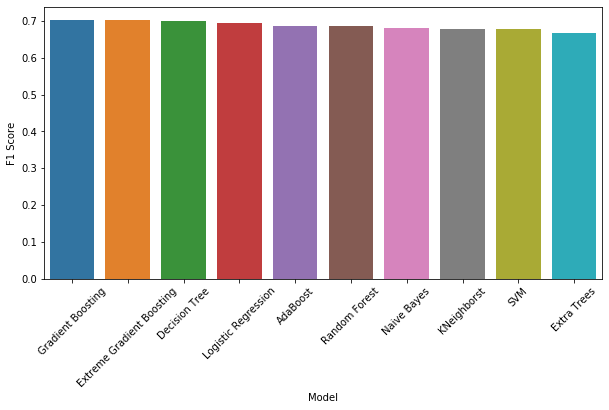

In [96]:
# Plot training accuracy for various models
plt.figure(figsize=(10,5))
sns.barplot(x=result['Model'],y=result["F1 Score"])
plt.xticks(rotation=45) # Rotation of model names
print ('Graph showing the F1 Score for the various models')

#### iii. Training Time

In [97]:
# sort by timing
result.sort_values(by=["Time"], axis=0 ,ascending=True, inplace=True)
result.set_index('Model')

,Accuracy(train),Accuracy(test),F1 Score,Time
Model,,,,
Naive Bayes,0.71832,0.71106,0.68099,0.04439
Decision Tree,0.73878,0.72125,0.69938,0.08049
Logistic Regression,0.72835,0.71824,0.69506,0.10230
AdaBoost,0.72972,0.72008,0.68669,2.58600
Gradient Boosting,0.73717,0.72444,0.70223,3.03555
Random Forest,0.98721,0.70019,0.68576,5.17517
Extra Trees,0.98723,0.68146,0.66778,5.69215
KNeighborst,0.72603,0.71094,0.67811,25.17822
Extreme Gradient Boosting,0.73842,0.72469,0.70142,29.75746


Graph showing the processing time for the various models


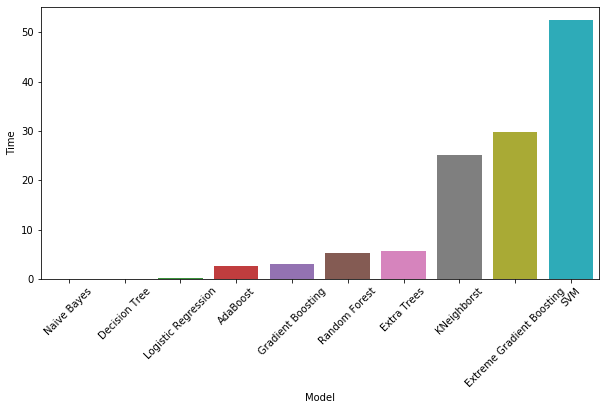

In [98]:
# Plot training time for various models
plt.figure(figsize=(10,5))
sns.barplot(x=result['Model'],y=result["Time"])
plt.xticks(rotation=45) # Rotation of model names

print ('Graph showing the processing time for the various models')

#### From the results, we will focus on the following model using Extreme Gradient Boosting

## 5. Tuning of XGBoost hyperparameters & Cross Validation

##### https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
Hyperparameter tuning is carried out for the Extreme Gradient Boosting to improve the performance
General Approach for Parameter Tuning.

In [99]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

### a. Tuning of max_depth & min_child_weight parameters

In [100]:
xgb = XGBClassifier(n_estimators= 2000, learning_rate=0.01)
print (xgb)
xgb.fit(dfx, dfy)
predict = xgb.predict(dfx)
acc = round(accuracy_score(dfy, predict), 5)
print (acc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
0.73544


In [101]:
# Step 1: Fix learning rate and number of estimators for tuning tree-based parameters
# Tuning of max_depth & min_child_weight
param_test1 = {
 'max_depth':range(1,8,1),
 'min_child_weight':range(1,8,1)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=2000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,cv=5)

gsearch1.fit(dfx, dfy)

# Print hyperparameter
print("Tuned hyperparameter: {}".format(gsearch1.best_params_)) 
print("Best score: {}".format(gsearch1.best_score_))

Tuned hyperparameter: {'max_depth': 2, 'min_child_weight': 4}
Best score: 0.7974258930152244


### b. Tuning of gamma

In [102]:
# Step 2: Tune gamma
# Use 'max_depth': 2, 'min_child_weight': 4
param_test2 = {'gamma':[i/10.0 for i in range(0,10)]}

gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=2000, max_depth=2,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)

gsearch2.fit(dfx, dfy)

# Print hyperparameter
print("Tuned hyperparameter: {}".format(gsearch2.best_params_)) 
print("Best score: {}".format(gsearch2.best_score_))

Tuned hyperparameter: {'gamma': 0.5}
Best score: 0.797437377755957


### c. Tuning of subsample & colsample_bytree

In [103]:
# Step 3: Tune subsample and colsample_bytree
# Use 'max_depth': 2, 'min_child_weight': 4, 'gamma': 0.5
param_test3 = {
 'subsample':[i/10.0 for i in range(6,12)],
 'colsample_bytree':[i/10.0 for i in range(1,8)]
}

gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=2000, max_depth=2,
 min_child_weight=4, gamma=0.5, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,cv=5)

gsearch3.fit(dfx, dfy)

# Print hyperparameter
print("Tuned hyperparameter: {}".format(gsearch3.best_params_)) 
print("Best score: {}".format(gsearch3.best_score_))

Tuned hyperparameter: {'colsample_bytree': 0.3, 'subsample': 1.0}
Best score: 0.7985117858843921


#### Optimized Parameters ('max_depth': 2, 'min_child_weight': 4, 'gamma': 0.5, 'colsample_bytree': 0.3, 'subsample': 1.0)

### d.  Cross Validation 
https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79

Cross Validation is used to assess the predictive performance of the models and and to judge how they perform outside the sample to a new data set also known as test data. The motivation to use cross validation techniques is that when we fit a model, we are fitting it to a training dataset.

In [105]:
# Cross validation for top 5 algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

lr = LogisticRegression( class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000, C = 1, penalty= 'l2')
dt = DecisionTreeClassifier(max_depth=8, min_samples_split=50, min_samples_leaf=50, random_state=13)
ada = AdaBoostClassifier(n_estimators=100)       
gb = GradientBoostingClassifier(n_estimators = 100)    
xgb = XGBClassifier(learning_rate =0.1, n_estimators=2000, max_depth=2,
      min_child_weight=4, gamma=0.5, subsample=1.0, colsample_bytree=0.3,
      objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
accuracies_xgb = cross_val_score(estimator=xgb, X=dfx, y=dfy, cv=10)
print("Extreme Gradient Boosting Average accuracy: ", accuracies_xgb.mean())
print("Extreme Gradient Boosting Standard Deviation: ", accuracies_xgb.std())

accuracies_gb = cross_val_score(estimator=gb, X=dfx, y=dfy, cv=10)
print("Gradient Boosting Average accuracy: ", accuracies_gb.mean())
print("Gradient Boosting Standard Deviation: ", accuracies_gb.std())

accuracies_dt = cross_val_score(estimator=dt, X=dfx, y=dfy, cv=10)
print("Decision Tree Average accuracy: ", accuracies_dt.mean())
print("Decision Tree Standard Deviation: ", accuracies_dt.std())

accuracies_ada = cross_val_score(estimator=ada, X=dfx, y=dfy, cv=10)
print("AdaBoosting Average accuracy: ", accuracies_ada.mean())
print("AdaBoosting Standard Deviation: ", accuracies_ada.std())

accuracies_lr = cross_val_score(estimator=lr, X=dfx, y=dfy, cv=10)
print("Logistic Regression Average accuracy: ", accuracies_lr.mean())
print("Logistic Regression Standard Deviation: ", accuracies_lr.std())

Extreme Gradient Boosting Average accuracy:  0.7323284920771627
Extreme Gradient Boosting Standard Deviation:  0.004677612963894862
Gradient Boosting Average accuracy:  0.7319907697477138
Gradient Boosting Standard Deviation:  0.004555104186902315
Decision Tree Average accuracy:  0.7290128493538093
Decision Tree Standard Deviation:  0.005768765772964501
AdaBoosting Average accuracy:  0.7273090440307917
AdaBoosting Standard Deviation:  0.00363061817869509
Logistic Regression Average accuracy:  0.7260656791877038
Logistic Regression Standard Deviation:  0.004372793000511551


#### Extreme Gradient Boosting gives the best average accuracy and the standard deviation is relatively low indicating the reliability of the training algorithm.

### e. Running the Xgb Algorithm to save the optimised trained model

In [105]:
from sklearn import metrics
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import pickle

xgb = XGBClassifier(learning_rate =0.1, n_estimators=2000, max_depth=2,
      min_child_weight=4, gamma=0.5, subsample=1.0, colsample_bytree=0.3,
      objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

xgb.fit(x_train, y_train)
y_train_predict = xgb.predict(x_train)
y_test_predict = xgb.predict(x_test)

accuracy1 = round(accuracy_score(y_train, y_train_predict), 5)
accuracy2 = round(accuracy_score(y_test, y_test_predict), 5) 
accuracy3 = round(f1_score(y_test, y_test_predict), 5)
    
print ('Training accuracy (optimized):', accuracy1, '(pre-optimized 0.73842)')
print ('Testing accuracy (optimized):', accuracy2, '(pre-optimized 0.72469)')
print ('F1 Score (optimized):', accuracy3, '(pre-optimized 0.70142)')

# save the optimised trained model
print ('\nSave the Optimised XGB Model')
model = xgb.fit(dfx, dfy)
filename = 'xgbopt_model.sav'
pickle.dump(model, open(filename, 'wb'))

Training accuracy (optimized): 0.73813 (pre-optimized 0.73842)
Testing accuracy (optimized): 0.725 (pre-optimized 0.72469)
F1 Score (optimized): 0.70154 (pre-optimized 0.70142)

Save the Optimised XGB Model


#### The hyperparameters tuning resulted in an improvement in both the testing accuracy and F1 Score.

## 6. Using Optimized XGB Classifier for Prediction

### a. Getting Information of Patient & Predicting

In [104]:
# Getting input data from users

def inputNumber(message):
  while True:
    try:
       userInput = int(input(message))       
    except ValueError:
       print("Please input an integer! Try again.")
       continue
    else:
       return userInput 
       break 

print ('\nThis alogorithm will try to predict if you are likely to have Cardiovascular Disease.')
print ('The following information is needed for the prediction.\n')

# Getting information for prediction
check = 'N'
while check == 'N' or check =='n':
    name = input ("Please input your name: ") 
    age = inputNumber ("Please input your age (in years): ")    
    gender = inputNumber ("Please input 1 for female & 2 for male: ")
    weight = inputNumber ("Please input your weight in kg: ")
    height = inputNumber ("Please input your height in cm: ")
    ap_hi = inputNumber ("Please input your Systolic Blood Pressure (the higher value) in mmHg: ")
    ap_lo = inputNumber ("Please input your Diastolic Blood Pressure (the lower value) in mmHg: ")
    cho = inputNumber ("Please input 1 for normal cholesterol, 2 for above normal cholesterol & for well above normal cholesterol: ")
    gluc = inputNumber("Please input 1 for normal gluclose, 2 for above normal gluclose & 3 for well above normal glucose: ")
    smoke = inputNumber("Please input 1 for smoker & 2 for non-smoker: ")
    alco = inputNumber ("Please input 1 for drinker & 2 for non-drinker: ")
    active = inputNumber ("Please input 1 for active & 2 for non-active: ")

    # Check Female/Male
    if gender == 1:
        gender1 = 'female'
    else:
        gender1 = 'male'
        gender == 2
       
    # Check the cholesterol 
    if cho == 1:
        cho1 = 'normal'
    elif cho == 2:
        cho1 = 'above normal'
    else:
        cho1 = 'well above normal'
        cho = 3

    # Checck the glucose 
    if gluc == 1:
        gluc1 = 'normal'
    elif gluc == 2:
        gluc1 = 'above normal'
    else:
        gluc1 = 'well above normal'
        gluc = 3
        
    # Check smoker/non-smoker
    if smoke == 1:
        smoke1 = 'smoker'
    else:
        smoke1 = 'non-smoker'
        smoke = 2

    # Check Active/Non active
    if alco == 1:
        alco1 = 'alcohol drinker'
    else:
        alco1 = 'non-alcohol drinker'
        alco = 2
       
    # Check Active/Non active
    if active == 1:
        active1 = 'active'
    else:
        active1 = 'non-active'
        active = 2

    print ('\n------------------------------------\n')
    print ('Your name :', name)
    print ('Your age is', age,'years old')
    print ('Your weight is', weight,'kg')
    print ('Your height is', height,'cm')
    print ('Your Systolic Blood Pressure is', ap_hi, 'mmHg')
    print ('Your Diastolic Blood Pressure is', ap_lo, 'mmHg')
    print ('Your cholesterol is', cho1)
    print ('Your glucose is', gluc1)
    print ('You are', gender1)
    print ('You are a', smoke1)     
    print ('You are', alco1)
    print ('You are', active1)    

    check = input ("\nIs the information correct (Y/N)?")

# calculation of bmi
n = (weight/height/height)*10000
if n <= 18.5:              #Underweight
        val = 2
        bmi1 = 'Underweight Category'
elif n> 18.5 and n<25:     #Healthy
        val = 1
        bmi1 = 'Healthy Category'
elif n>= 25 and n<30:      #Overweight
        val = 3
        bmi1 = 'Overweight Category'
else:
        val = 4             #Obese
        bmi1 = 'Obese Category'
bmi = val
print ('\nYour BMI is', round(n,2),'and you are in', bmi1)
    
# calculation of blood pressure category
n = ap_hi
v = ap_lo
if n <= 120 and v <= 80:                           # Normal
        bpc = 1
        bpc1 = 'Normal'
elif n > 120 and n <= 130 and v <= 80:              # Elevated 
        bpc = 2 
        bpc1 = 'Elevated'
elif n >= 130 and n <= 140 or v >= 80 and v <= 90:   # High blood pressure stage 1(Hypertension) 
        bpc =3  
        bpc1 = 'Hypertension Stage 1'
elif n >= 140 and n <= 180 or v >= 90 and v <= 120:  # High blood pressure stage 2(Hypertension)
        bpc = 4 
        bpc1 = 'Hypertension Stage 2'
elif n >= 180 or v >= 120:                         # Hyertensive Crisis (see doctor immediately)
        bpc = 5    
        bpc1 = 'Hyertensive Crisis - Please consult doctor immediately'
else:
        bpc = 5
        bpc1 = 'Your blood pressure result is abnormal.  Plese consult doctor.'

print ('Your Blood Pressure Category is', bpc1)

#Putting this information into new dataframe for prediction
predict = pd.DataFrame(columns = ('age','gender','height','weight','ap_hi','ap_lo',
                                'cholesterol','gluc','smoke','alco','active','bmi','bpc'))
single=np.array([age, gender, height, weight, ap_hi, ap_lo, cho, gluc, smoke, alco, active, bmi, bpc])
single = single.astype(int)
predict.loc[0] = single

# convert from type(object) to type(integer)
predict['age'] = predict['age'].astype(int)
predict['gender'] = predict['gender'].astype(int)
predict['height'] = predict['height'].astype(int)
predict['weight'] = predict['weight'].astype(int)
predict['ap_hi'] = predict['ap_hi'].astype(int)
predict['ap_lo'] = predict['ap_lo'].astype(int)
predict['cholesterol'] = predict['cholesterol'].astype(int)
predict['gluc'] = predict['gluc'].astype(int)
predict['smoke'] = predict['smoke'].astype(int)
predict['alco'] = predict['alco'].astype(int)
predict['active'] = predict['active'].astype(int)
predict['bmi'] = predict['bmi'].astype(int)
predict['bpc'] = predict['bpc'].astype(int)

# Using the tuned parameters and using XGB Classifier to predict CVD
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(learning_rate =0.1, n_estimators=2000, max_depth=2,
      min_child_weight=4, gamma=0.5, subsample=1.0, colsample_bytree=0.3,
      objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

# load the model from disk
loaded_model = pickle.load(open('xgbopt_model.sav', 'rb'))

#xgb.fit(dfx, dfy)
#cvd_predict = xgb.predict(predict)
cvd_predict = loaded_model.predict(predict)

print ("\033[1m" + '\nHello,' ,name, "\033[1m")
if cvd_predict != 0:
    print("\033[1m"+"\nThe probability of you having or to have a Cardiovascular Disease is high. :(")
    print("You must visit a doctor to check it." + "\033[0m")
else:
    print("\033[1m"+"\nThe probability of you having or to have a Cardiovascular Disease is low. ")
    print("Congratulations! You are healthy. :)" + "\033[0m")

print ('\n---------------------------------------------------------------------------------------------------\n')  
print ('Thank you for using this tool.')    
print ('This prediction of Cardiovascular Disease is carried out using Machine Learning.')
print ('It is important that the user understands this is still a prediction and not an absolute.')
print ('The authors/developers of the tools are in no way liable for outcomes following the use of the tools.')
print ('\n---------------------------------------------------------------------------------------------------\n') 



This alogorithm will try to predict if you are likely to have Cardiovascular Disease.
The following information is needed for the prediction.

Please input your name: koh
Please input your age (in years): 56
Please input 1 for female & 2 for male: 2
Please input your weight in kg: 65
Please input your height in cm: 173
Please input your Systolic Blood Pressure (the higher value) in mmHg: 120
Please input your Diastolic Blood Pressure (the lower value) in mmHg: 80
Please input 1 for normal cholesterol, 2 for above normal cholesterol & for well above normal cholesterol: 1
Please input 1 for normal gluclose, 2 for above normal gluclose & 3 for well above normal glucose: 1
Please input 1 for smoker & 2 for non-smoker: 2
Please input 1 for drinker & 2 for non-drinker: 2
Please input 1 for active & 2 for non-active: 1

------------------------------------

Your name : koh
Your age is 56 years old
Your weight is 65 kg
Your height is 173 cm
Your Systolic Blood Pressure is 120 mmHg
Your Diasto

#### This program has been loaded to GitHub.

### --- End of Program ---